<a href="https://colab.research.google.com/github/AnupJoseph/adv-python/blob/master/Histogram_Plotting_%2B_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from collections import Counter
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
# For odd reasons I simply don't understand this doesn't work if run inside the import cell
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
values = (0, 1, 1, 1, 2, 3, 7, 7, 23)
value_count = Counter(values)
value_count

Counter({0: 1, 1: 3, 2: 1, 3: 1, 7: 2, 23: 1})

In [3]:
def ascii_histogram(seq) -> None:
  """
    A horizontal frequency-table/histogram plot.
  """
  counted = Counter(seq)
  for k in sorted(counted):
    print("{0:5d} {1}".format(k,'+'*counted[k]))

In [4]:
random.seed(1)

vals = [1, 3, 4, 6, 8, 9, 10]

# Each value will appear between 5 and 15 times
freq = (random.randint(5,15) for _ in vals)

# Creating
data = []
for f,v in zip(freq,vals):
  data.extend([v]*f)

ascii_histogram(data)

    1 +++++++
    3 ++++++++++++++
    4 ++++++
    6 +++++++++
    8 ++++++
    9 ++++++++++++
   10 ++++++++++++


In [5]:
# Alright till now we have been cheating a bit and make it sound as if the about function is actually a histogram
# It isn't though and hence now we switch our focus to that

# More technically, it can be used to approximate the probability density function (PDF) of the underlying variable.If that sound awkward then thats fine.
# Moving on from the “frequency table” above, a true histogram first “bins” the range of values and then counts the number of values that fall into each bin

In [6]:
np.random.seed(444)
np.set_printoptions(precision=3)

d = np.random.laplace(loc=15,scale=3,size=500)
d[:5]

array([18.406, 18.087, 16.004, 16.221,  7.358])

In [7]:
# In the above case the laplacian distribution is a continous function and tracking down its last decimal place is kind of useless
# Instead, you can bin or “bucket” the data and count the observations that fall into each bin
# using the standard numpy histogram function

hist,bin_edges = np.histogram(d)

print(hist,bin_edges,sep='\n')

[ 13  23  91 261  80  21   7   2   1   1]
[ 2.11   5.874  9.638 13.402 17.166 20.93  24.694 28.458 32.222 35.986
 39.749]


In [8]:
print(hist.size,bin_edges.size,sep='\n')

10
11


In [10]:
first_edge,last_edge = min(values),max(values)

n_equal_bins = 10
bin_edges = np.linspace(start = first_edge,stop=last_edge,num=n_equal_bins+1,endpoint=True)

bin_edges

array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ])

In [11]:
# Way to reproduce collections.Counter

bcounts = np.bincount(values)
hist,_ = np.histogram(values, range=(0,max(values)),bins=max(values)+1)

# Reproducing collections.Counter
dict(zip(np.unique(values), bcounts[bcounts.nonzero()]))

{0: 1, 1: 3, 2: 1, 3: 1, 7: 2, 23: 1}

(0.0, 80.0)

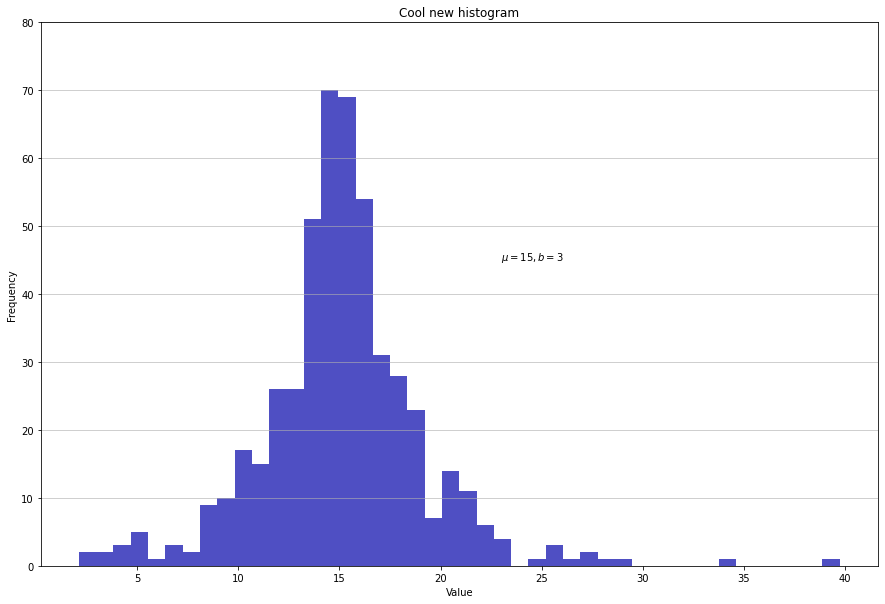

In [22]:
# plt.figure(figsize=(15,10))
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa', alpha=0.7, rwidth=8.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title("Cool new histogram")
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

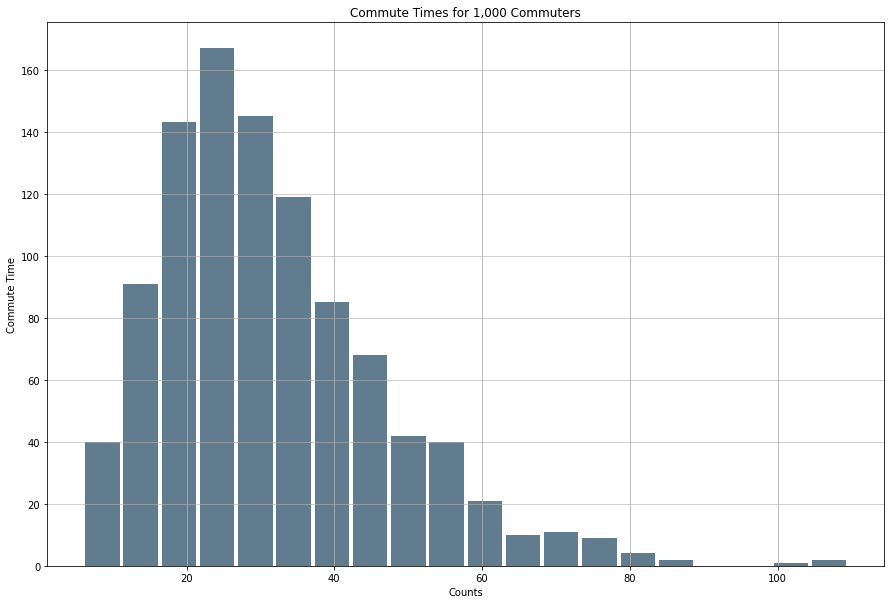

In [26]:
# Plotting made for commute times of customers using pandas API
size,scale = 1000,10
commutes = pd.Series(np.random.gamma(scale,size=size)**1.5)

commutes.plot.hist(grid=True,bins=20,rwidth=0.9,color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

In [27]:
# Using KDE(Kernel Density Estimate)

means = 10,20
std_devs = 4,2
dist = pd.DataFrame(np.random.normal(loc=means, scale=std_devs, size=(1000, 2)),columns=['a','b'])
dist.agg(['min', 'max', 'mean', 'std'])

,a,b
min,-3.051803,13.267655
max,20.233983,26.440998
mean,9.896360,19.936057
std,3.829561,2.042865


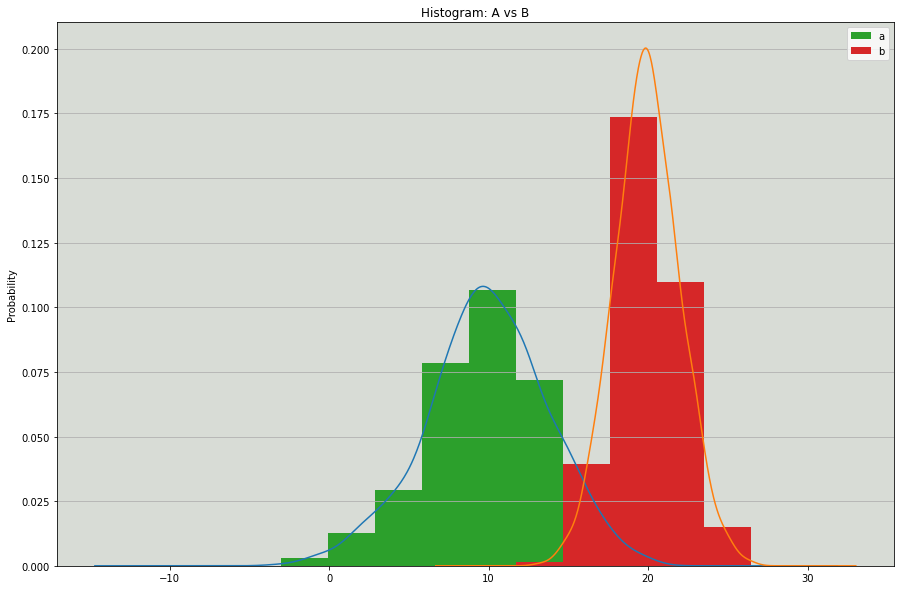

In [28]:
fig, ax = plt.subplots()
dist.plot.kde(ax=ax,legend = False, title = 'Histogram: A vs B')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')